# Análisis estadístico de salario

<!-- Créditos al dataset de kaggle: https://www.kaggle.com/datasets/ayessa/salary-prediction-classification 

Extraído de la web:   
Extraction was done by Barry Becker from the 1994 Census database.  
Prediction task is to determine whether a person makes over 50K a year.  

Columns are:  
age: continuous.  
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.  
fnlwgt: continuous.  
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  
education-num: continuous.  
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing,   Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.  
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.  
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.  
sex: Female, Male.  
capital-gain: continuous.  
capital-loss: continuous.  
hours-per-week: continuous.  
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras,   Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
salary: <=50K or >50K  
Source: https://archive.ics.uci.edu/ml/datasets/Census+Income  
Thumbnail: https://www.deskera.com/blog/net-salary/   -->

In [1]:
import pandas as pd
import typing as t
import csv
import altair as alt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

Créditos: https://www.kaggle.com/datasets/ayessa/salary-prediction-classification 

Información del dataset:  

Extraction was done by Barry Becker from the 1994 Census database.  
Prediction task is to determine whether a person makes over 50K a year.  

Columns are:  
age: continuous.  
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.  
fnlwgt: continuous.  
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  
education-num: continuous.  
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.  
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.  
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.  
sex: Female, Male.  
capital-gain: continuous.  
capital-loss: continuous.  
hours-per-week: continuous.  
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.  
salary: <=50K or >50K  
Source: https://archive.ics.uci.edu/ml/datasets/Census+Income  
Thumbnail: https://www.deskera.com/blog/net-salary/

Explicación mejorada con GPT:

| **Columna**        | **Tipo**           | **Descripción**                                                                                                                        |
| ------------------ | ------------------ | -------------------------------------------------------------------------------------------------------------------------------------- |
| **age**            | Numérica continua  | Edad del individuo (en años).                                                                                                          |
| **workclass**      | Categórica         | Tipo de empleador del individuo, como privado, gobierno, etc.                                                                          |
| **fnlwgt**         | Numérica continua  | **Peso de la muestra**: número usado por el censo para expandir una persona en la población. A menudo ignorado en modelos predictivos. |
| **education**      | Categórica         | Nivel educativo nominal, como “Bachelors”, “HS-grad”, etc.                                                                             |
| **education-num**  | Numérica discreta  | Nivel educativo como número. Ej.: “Bachelors” = 13. Se correlaciona con `education`.                                                   |
| **marital-status** | Categórica         | Estado civil del individuo: casado, divorciado, nunca casado, etc.                                                                     |
| **occupation**     | Categórica         | Tipo de ocupación o trabajo que realiza. Ej: ventas, técnicos, ejecutivos, etc.                                                        |
| **relationship**   | Categórica         | Relación con el jefe de familia: esposo/a, hijo/a, no en la familia, etc.                                                              |
| **race**           | Categórica         | Raza/etnia del individuo.                                                                                                              |
| **sex**            | Categórica         | Sexo biológico: “Male” o “Female”.                                                                                                     |
| **capital-gain**   | Numérica continua  | Ganancia de capital (ej. ganancias por inversiones). Muchas veces es 0.                                                                |
| **capital-loss**   | Numérica continua  | Pérdida de capital. También suele ser 0 para la mayoría.                                                                               |
| **hours-per-week** | Numérica continua  | Horas trabajadas por semana.                                                                                                           |
| **native-country** | Categórica         | País de origen del individuo.                                                                                                          |
| **salary**         | Categórica binaria | Objetivo del modelo. Si gana **más de 50K o no** (`<=50K`, `>50K`).                                                                    |


## Funciones

In [2]:
def read_csv_to_dataframe(file:str) -> pd.DataFrame:
    "Lectura del archivo"
    try:
        data: pd.Dataframe = pd.read_csv(file)
        return data
    except:
        print ("No se ha cargado el csv")
def percentage_of_total (cuantity: int, total:int) -> any:
    return (cuantity * 100)/total
    
def clean_dataframe_whitespace(df: pd.DataFrame) -> pd.DataFrame:
    df.columns = df.columns.str.strip()
    for col in df.select_dtypes(include=['object', 'string']).columns:
        df[col] = df[col].str.strip()
    
    return df
    


In [3]:
data=read_csv_to_dataframe("salary.csv")
print(data.head(10))

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6   49            Private  160187         9th              5   
7   52   Self-emp-not-inc  209642     HS-grad              9   
8   31            Private   45781     Masters             14   
9   42            Private  159449   Bachelors             13   

           marital-status          occupation    relationship    race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   White   
3  

In [4]:
# Comenzamos estudiando las estadísticas que nos interesan, dado que es un dataset sobre salario:


print(f"Total de filas y columnas: {data.shape}")
print("------------------------")
print(f"Caso de mayor edad: {data['age'].max()}")
serie_age = (data["age"] == 90).sum()
print(f"Número de personas con 90 años: {serie_age} que representa un {percentage_of_total(serie_age,len(data))}% sobre el total")
print("------------------------")
print(f"Caso de menor edad: {data['age'].min()}")
serie_age = (data["age"] == 17).sum()
print(f"Número de personas con 17 años: {serie_age} que representa un {percentage_of_total(serie_age,len(data))}% sobre el total")



Total de filas y columnas: (32561, 15)
------------------------
Caso de mayor edad: 90
Número de personas con 90 años: 43 que representa un 0.13205982617241485% sobre el total
------------------------
Caso de menor edad: 17
Número de personas con 17 años: 395 que representa un 1.2131077055372992% sobre el total


Podemos observar que la cantidad de individuos con la edad mínima es bastante más elevada que los de edad máxima (algo bastante lógico, teniendo en cuenta que el máximo es 90 años)

In [5]:
#Aquí tenemos un error común y algo que se debe limpiar, que no existan espacios al inicio del nombre de las )columnas.
print(data["sex"].unique())
datacopy=data.copy()
df = clean_dataframe_whitespace(datacopy)


femaleCount = (df["sex"] == "Female").sum()
print(f"Total de mujeres: {femaleCount}, representan un total de {percentage_of_total(femaleCount, len(df))}% sobre el dataset")
maleCount = (df["sex"] == "Male").sum()
print(f"Total de hombres: {maleCount}, representan un total de {percentage_of_total(maleCount, len(df))}% sobre el dataset")


total        = len(df)

counts_df = pd.DataFrame({
    "sex": ["Hombres", "Mujeres"],
    "count": [maleCount, femaleCount],
    "percentage": [percentage_of_total(maleCount, total),
                   percentage_of_total(femaleCount, total)]
})



chart = alt.Chart(counts_df).mark_bar().encode(
    x=alt.X('sex:N', title='Género'),
    y=alt.Y('count:Q', title='Total'),
    color=alt.Color('sex:N', legend=None)
).properties(
    title='Conteo de Hombres y Mujeres en el Dataset',
    width=500,
    height=400
)

chart.show()

[' Male' ' Female']
Total de mujeres: 10771, representan un total de 33.07945087681582% sobre el dataset
Total de hombres: 21790, representan un total de 66.92054912318417% sobre el dataset


alt.Chart(...)

In [6]:
# Estudio de la variable objetivo

unique_salary = df["salary"].unique()
print(f"Columnas diferentes de salario {unique_salary}")
total_salary_min = (df["salary"] == "<=50K").sum()
total_salary_max = (df["salary"] == ">50K").sum()
print("----------------")
print(f"El total de personas que cobran <=50K: {total_salary_min} ")
print(f"El total de personas que cobran >50K: {total_salary_max} ")
print("------------------------")

altdata = pd.DataFrame({
    "salary": ["<=50K", ">50K"],
    "count": [total_salary_min, total_salary_max],
})


chart = alt.Chart(altdata).mark_bar().encode(
    x=alt.X('salary:N', title='Rango salarial'),
    y=alt.Y('count:Q', title='Total'),
    color=alt.Color('salary:N', legend=None)
).properties(
    title='Rango salarial',
    width=500,
    height=400
)

chart.show()

Columnas diferentes de salario ['<=50K' '>50K']
----------------
El total de personas que cobran <=50K: 24720 
El total de personas que cobran >50K: 7841 
------------------------


alt.Chart(...)

Podemos ver que la **mayoría de los datos es de gente que cobra menos o igual que 50k**, el desbalance es demasiado grande, es posible que esté fuertemente sesgado, igual que en el ratio hombres-mujeres, siendo un 66% vs 33%

In [7]:
# Vamos a ver según el lugar de nacimiento de la persona los rangos salariales

unique_native_country = df["native-country"].unique()
print(f"Paises de origen diferentes {unique_native_country}")





counts = (
    df.groupby("native-country")
      .size()
      .reset_index(name="count")
)


print(counts)


total = counts["count"].sum()
counts["percentage"] = (counts["count"] / total * 100).round(1)


donut = alt.Chart(counts).mark_arc(innerRadius=120, outerRadius=200).encode(
    theta=alt.Theta(field='count', type='quantitative', title='Registros'),
    color=alt.Color(field='native-country', type='nominal', title='País'),
    tooltip=[
        alt.Tooltip('native-country:N', title='País'),
        alt.Tooltip('count:Q', title='Total registros'),
        alt.Tooltip('percentage:Q', title='Porcentaje (%)')
    ]
).properties(
    title='Distribución de Registros por País de Nacimiento',
    width=600,
    height=600
)

donut

Paises de origen diferentes ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']
                native-country  count
0                            ?    583
1                     Cambodia     19
2                       Canada    121
3                        China     75
4                     Columbia     59
5                         Cuba     95
6           Dominican-Republic     70
7                      Ecuador     28
8                  El-Salvador    106
9                      England     90
10                      France     29
11                     Germany    137
12       

alt.Chart(...)

Parece que **la mayoría de datos proviene de estados unidos**  
A continuación, crearé 2 subdatasets, uno que sea con <=50k y otro >50k, sacaré otros 2 gráficos a ver si cambian los mark_arc

In [8]:
# Subconjuntos
df_low  = df[df["salary"] == "<=50K"]
df_high = df[df["salary"] == ">50K"]

# Conteos
counts_low  = df_low.groupby("native-country").size().reset_index(name="count")
counts_high = df_high.groupby("native-country").size().reset_index(name="count")

# Porcentajes
counts_low["percentage"]  = (counts_low["count"]  / counts_low["count"].sum()  * 100).round(1)
counts_high["percentage"] = (counts_high["count"] / counts_high["count"].sum() * 100).round(1)

# Donuts
donut_low = alt.Chart(counts_low).mark_arc(innerRadius=100, outerRadius=180).encode(
    theta=alt.Theta("count:Q", title="Registros"),
    color=alt.Color("native-country:N", title="País"),
    tooltip=[
        alt.Tooltip("native-country:N", title="País"),
        alt.Tooltip("count:Q", title="Total registros"),
        alt.Tooltip("percentage:Q", title="Porcentaje (%)")
    ]
).properties(
    title="Distribución Países (≤50K)",
    width=350, height=350
)

donut_high = alt.Chart(counts_high).mark_arc(innerRadius=100, outerRadius=180).encode(
    theta=alt.Theta("count:Q"),
    color=alt.Color("native-country:N"),
    tooltip=[
        alt.Tooltip("native-country:N"),
        alt.Tooltip("count:Q"),
        alt.Tooltip("percentage:Q")
    ]
).properties(
    title="Distribución Países (>50K)",
    width=350, height=350
)

# Lado a lado con escala de color compartida
(donut_low | donut_high).resolve_scale(color='shared')

alt.HConcatChart(...)

Podemos observar que los datos se parecen mucho en proporción, pero hay una gran diferencia, en México parece que es más común que se perciba un salario por debajo o igual a 50k

Diferentes ocupaciones: 15
Ocupaciones: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']


<Figure size 1500x1200 with 0 Axes>

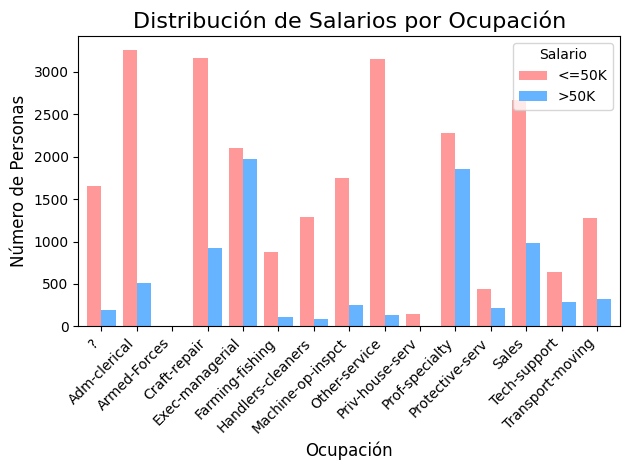

In [9]:
#Analicemos la ocupación respecto al salario
dif_occupations = df["occupation"].unique()
print (f"Diferentes ocupaciones: {len(dif_occupations)}")
print(f"Ocupaciones: {dif_occupations}")

salary_by_occupation = df.groupby(['occupation', 'salary']).size().unstack(fill_value=0)


plt.figure(figsize=(15, 12))
salary_by_occupation.plot(kind='bar', stacked=False, color=['#FF9999', '#66B3FF'], width=0.8)

#Gráfico de barras agrupadas.
plt.title('Distribución de Salarios por Ocupación', fontsize=16)
plt.xlabel('Ocupación', fontsize=12)
plt.ylabel('Número de Personas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Salario', loc='upper right', labels=['<=50K', '>50K'])
plt.tight_layout()


plt.show()


Información relevante que podemos extraer: 
-Muchas personas cobran por debajo o igual de 50K, la clara mayoría.
-El empleo en el que más gente trabaja por <=50K es Adm-clerical, seguido por Craft-repair y Other-service.
-El empleo que tiene más gente cobrando >50K es Exec-managerial, seguido por Prof-speciality

In [10]:
#Vamos a describir el dataset, para ver si existen valores nulos outliers, etc...

print(df.describe()) #Esto es solo para numéricos

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


## Varios datos aquí son muy interesantes:  

### En edad:  
-La media es 38, coherente.  
-La desviación típica es 13, por lo tanto hay bastante dispersión, esto es normal puesto que la diferencia entre máximo y mínimo es 17 a 90, no parece haber outliers como tal.  

### En capital-gain:  
-La desviación típica es muchísima, pero dada la escala de los datos (viendo el máximo y mínimo), no parece ser tanta desviación como a priori parece. Es mucha, pero no en escala.  
### En horas trabajadas por semana:  
-La media de horas trabajadas por semana es 40, lo cual es un indicador extraño, pero lo estoy comparando con el trabajo español (donde 40 horas es el máximo), el cual está más regulado que en estados unidos.
El mínimo es una hora y el máximo es 99 horas a la semana. Esto es extraño, posibles outliers, especialmente por arriba.


In [11]:



source = pd.DataFrame({
    "age": df["age"],
    "hours-per-week": df["hours-per-week"],
    "salary": df["salary"]
})

fig = px.scatter(source, 
                 x="age", 
                 y="hours-per-week", 
                 color="salary", 
                 hover_data=["age", "hours-per-week", "salary"],
                 labels={"age": "Edad", "hours-per-week": "Horas por semana", "salary": "Salario"})


fig.show()


Este gráfico nos confirma que efectivamente existen outliers, hay casos extremos como gente con 90 años trabajando  más de 90 horas a la semana y gente trabajando menos de 5 horas a la semana y cobrando más de 50K. Es posible esto último, pero serán casos muy aislados, susceptibles de ser eliminables.
Obviando todo esto, parece que los valores de >50K están por el medio concentrados, donde están aprox las 40 horas trabajadas.

In [12]:

fig = px.violin(source, 
                x="salary", 
                y="hours-per-week", 
                box=True, 
                points="all", 
                labels={"salary": "Salario", "hours-per-week": "Horas por semana"})
fig.show()

In [13]:
source_grouped = source.groupby(['age', 'salary']).size().reset_index(name='count')

fig = px.bar(source_grouped, 
             x='age', 
             y='count', 
             color='salary', 
             labels={"age": "Edad", "count": "Cantidad de personas", "salary": "Salario"},
             title="Distribución de Salarios por Edad")
fig.show()

In [14]:
fig = px.scatter_3d(source, 
                    x="age", 
                    y="hours-per-week", 
                    z="salary", 
                    color="salary", 
                    labels={"age": "Edad", "hours-per-week": "Horas por semana", "salary": "Salario"})
fig.show()

## Correlaciones

In [15]:
correlation_matrix = df.corr(numeric_only=True, min_periods=2)
print(f"Correlaciones entre todas las columnas numéricas (Pearson): \n\n{correlation_matrix}")

Correlaciones entre todas las columnas numéricas (Pearson): 

                     age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.076646       0.036527      0.077674      0.057775   
fnlwgt         -0.076646  1.000000      -0.043195      0.000432     -0.010252   
education-num   0.036527 -0.043195       1.000000      0.122630      0.079923   
capital-gain    0.077674  0.000432       0.122630      1.000000     -0.031615   
capital-loss    0.057775 -0.010252       0.079923     -0.031615      1.000000   
hours-per-week  0.068756 -0.018768       0.148123      0.078409      0.054256   

                hours-per-week  
age                   0.068756  
fnlwgt               -0.018768  
education-num         0.148123  
capital-gain          0.078409  
capital-loss          0.054256  
hours-per-week        1.000000  


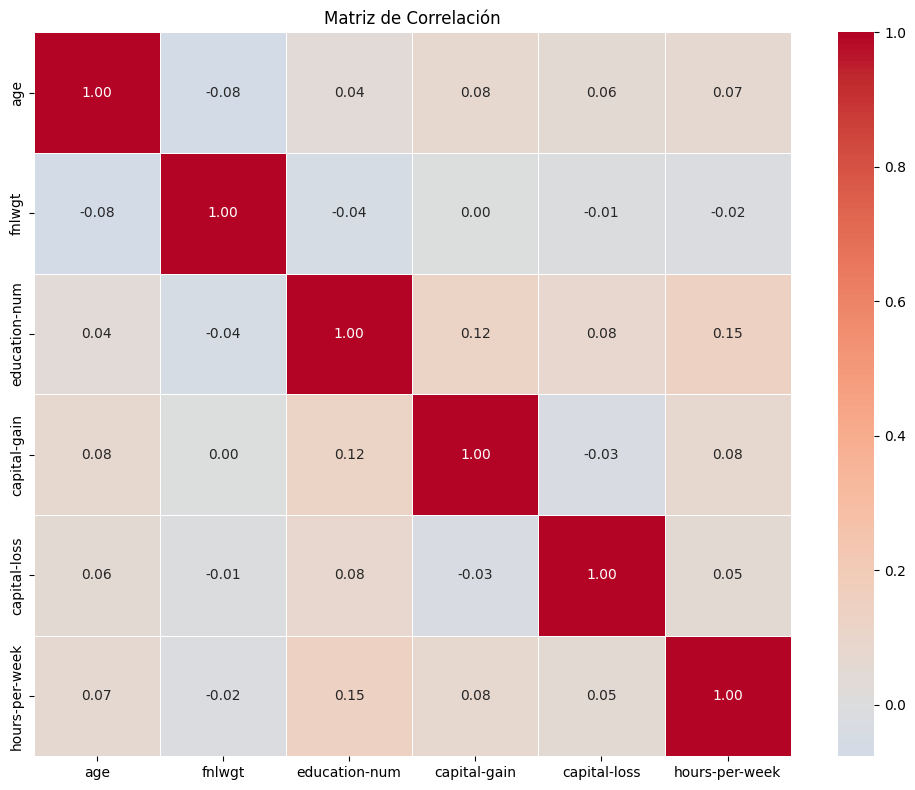

In [16]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)


plt.title('Matriz de Correlación')
plt.tight_layout()


plt.show()

Parece que la relación es débil en todos los casos, es como si todo fueran variables independientes. Parece que Pearson no es una buena opción. Probaremos con Spearman, que mide las relaciones monótonas, no necesariamente lineales.

Correlaciones entre todas las columnas numéricas (Spearman): 

                     age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.078141       0.066345      0.124948      0.058484   
fnlwgt         -0.078141  1.000000      -0.035706     -0.006039     -0.006914   
education-num   0.066345 -0.035706       1.000000      0.119140      0.074749   
capital-gain    0.124948 -0.006039       0.119140      1.000000     -0.066569   
capital-loss    0.058484 -0.006914       0.074749     -0.066569      1.000000   
hours-per-week  0.142907 -0.021621       0.167215      0.093322      0.059852   

                hours-per-week  
age                   0.142907  
fnlwgt               -0.021621  
education-num         0.167215  
capital-gain          0.093322  
capital-loss          0.059852  
hours-per-week        1.000000  


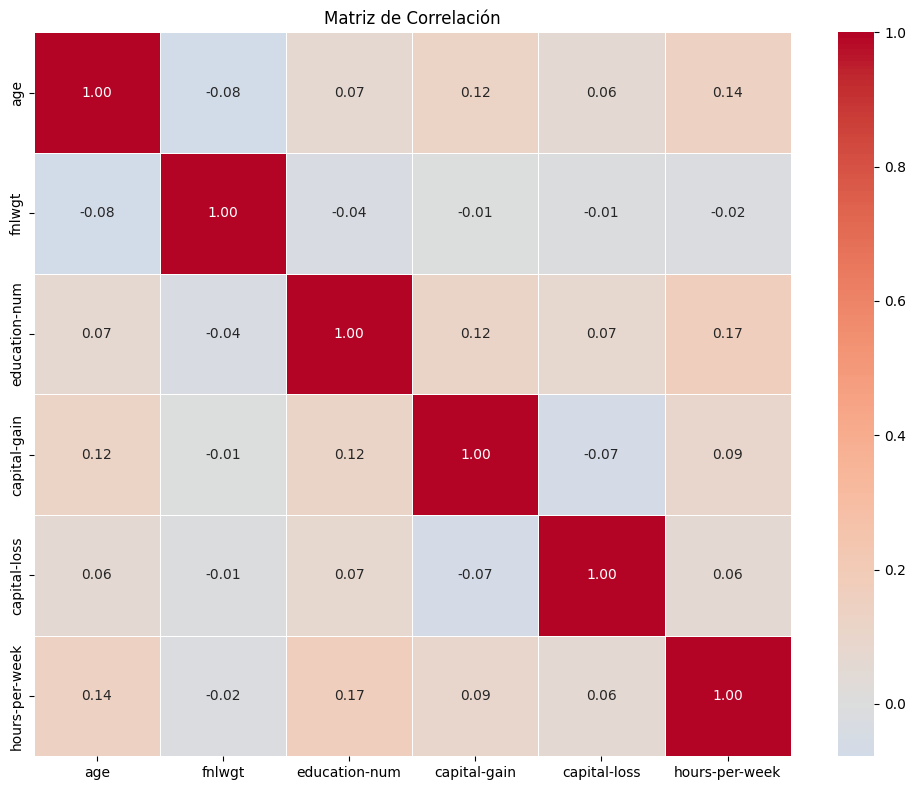

In [17]:
correlation_matrix = df.corr(numeric_only=True, min_periods=2, method="spearman")
print(f"Correlaciones entre todas las columnas numéricas (Spearman): \n\n{correlation_matrix}")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)


plt.title('Matriz de Correlación')
plt.tight_layout()


plt.show()

Seguimos observando que hay una relación mínima entre las variables, está claro que tienen que estar relacionadas, pero de otras formas o con los valores categóricos.